# Visualizing regression models

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('seaborn-ticks')
%matplotlib inline

    许多数据集包含多个定量变量，分析的目标通常是将这些变量相互关联。我们之前讨论了可以通过显示两个变量的联合分布来实现这一点的函数。但是，使用统计模型来估计两组观察结果之间的简单关系会非常有帮助。本章讨论的函数将通过线性回归的通用框架来实现。

    seaborn 中的回归图主要目的是添加一个视觉指南，帮助在探索性数据分析期间突出数据集中的模式。也就是说seaborn本身并不是一个统计分析的包。要获得与回归模型拟合相关的定量测量，应该使用 statsmodels。然而，seaborn 的目标是通过可视化快速轻松地探索数据集。

## Functions to draw linear regression models

    seaborn有两个主要函数用于可视化通过回归确定的线性关系。regplot() 和 lmplot() 密切相关，并且共享其大部分核心功能。但是，了解它们的不同之处非常重要，这样就可以快速为特定工作选择正确的工具。

    在最简单的调用中，两个函数都绘制两个变量 x 和 y 的散点图，然后拟合回归模型 y ~ x 并绘制生成的回归线和该回归的 95% 置信区间：

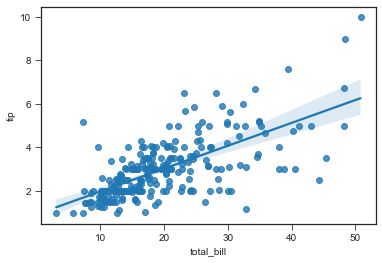

In [2]:
tips = sns.load_dataset("tips")

sns.regplot(x="total_bill", y="tip", data=tips);

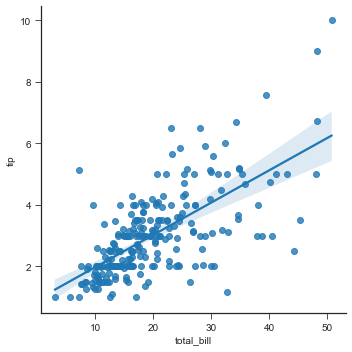

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips);

    注意到，生成的图是相同的，只是图形形状不同。

    另一个主要区别是 regplot() 接受各种格式的 x 和 y 变量，包括简单的 numpy 数组、pandas Series 对象，或者作为传递给数据的 pandas DataFrame 对象中变量的引用。
    相反，lmplot() data参数是必需参数，并且必须将 x 和 y 参数指定为字符串。这种数据格式称为“long-form”或“tidy”数据。
    regplot()除了输入灵活性之外，还具有 lmplot() 的部分功能，将使用lmplot()来演示这部分功能。

    当其中一个变量采用离散值时，也可以拟合线性回归，但是，由此类数据集生成的简单散点图通常不是最优的：

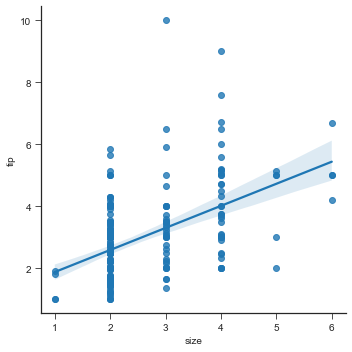

In [4]:
sns.lmplot(x="size", y="tip", data=tips);

    可以在离散值中添加一些随机抖动 jitter，使值的分布更加清晰。请注意，jitter 仅应用于散点图数据，不会影响回归线拟合本身：


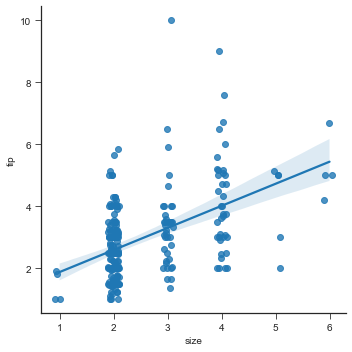

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.1);

    另一个选项是对每个离散条柱中的观测值折叠，以绘制中心趋势的估计值以及置信区间

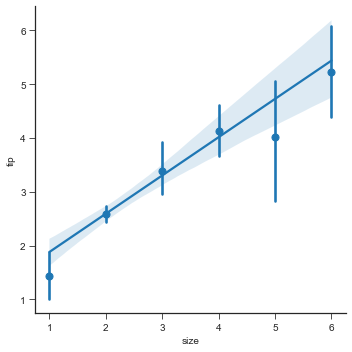

In [11]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Fitting different kinds of models

    上面使用的简单线性回归模型非常容易拟合，但是，它不适合某些类型的数据集。

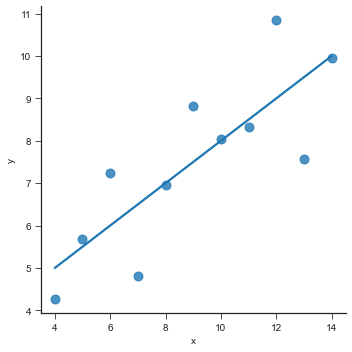

In [12]:
anscombe = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

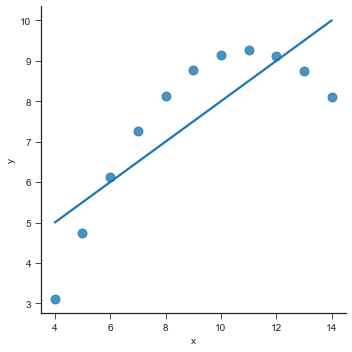

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

    在存在这些高阶关系的情况下，lmplot() 和 regplot() 可以拟合多项式回归模型来探索数据集中简单的非线性趋势：

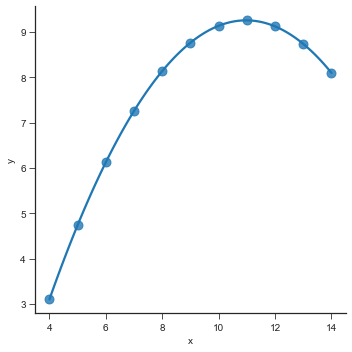

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

    “异常值”观察值也是一个问题，这些观察结果因所研究的主要关系以外的某种原因而偏离。

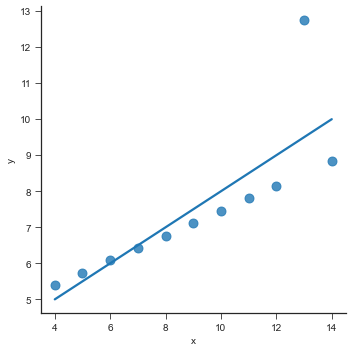

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

    在存在异常值的情况下，拟合稳健回归可能更好，该回归使用不同的损失函数来减少相对较大的残差对回归参数的影响。

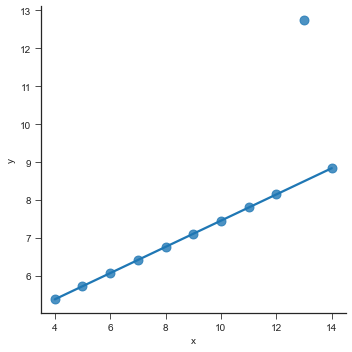

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

    当 y 变量为二元变量时，简单的线性回归也“有效”的，但不是最佳方法

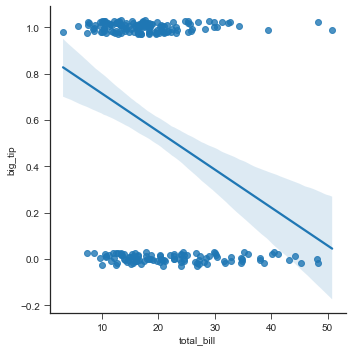

In [17]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

    在这种情况下，解决方案是拟合logistic回归，回归线的意义为，对于任意给定的 x 值，y = 1 的估计概率。

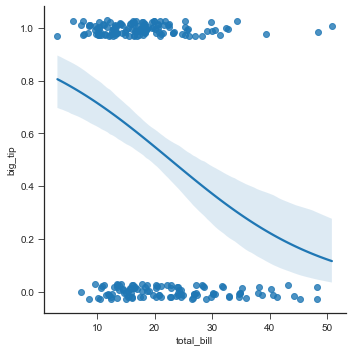

In [18]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

    请注意，逻辑回归的计算量（稳健回归也是如此）比简单回归多得多，并且由于回归线周围的置信区间是使用bootstrap计算的，因此对于超大数据集，可以关闭置信区间功能，加快迭代速度（ci=None）。

    另一种完全不同的方法是使用 lowess smoother 拟合非参数回归。这种方法具有最少的假设，由于计算量大的，因此目前根本不计算置信区间：

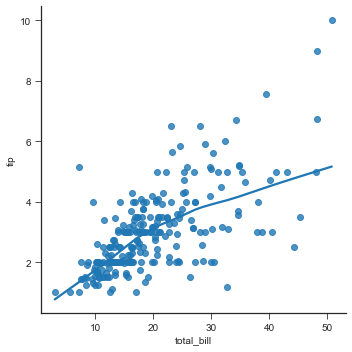

In [21]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

    residplot() 函数是检查简单回归模型是否适用于数据集的有用工具。
    它拟合并绘制每个观测值的残差值。理想情况下，这些值应随机散布在 y = 0 周围：

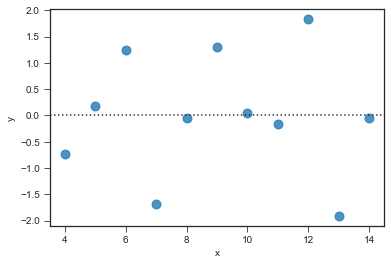

In [22]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

    如果残差图中存在某种趋势，则表明简单的线性回归不合适，可能用多项式回归拟合高阶项：

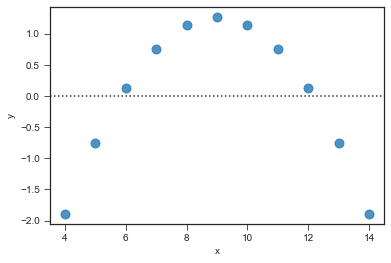

In [23]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables

    上面的图显示了探索一对变量之间关系的多种方法。
    然而，通常，一个更有趣的问题是“这两个变量之间的关系如何随第三个变量的变化而变化？
    
    这就是 regplot() 和 lmplot() 之间差异出现的地方。虽然 regplot() 始终显示单一关系，但 lmplot() 将 regplot() 与 FacetGrid 相结合，以提供一个简单的界面来显示“facet”图上的线性回归，从而允许探索与最多三个附加分类变量的交互。

    分离出关系的最佳方法是在同一axes上绘制两个级别，并使用hue来区分它们：

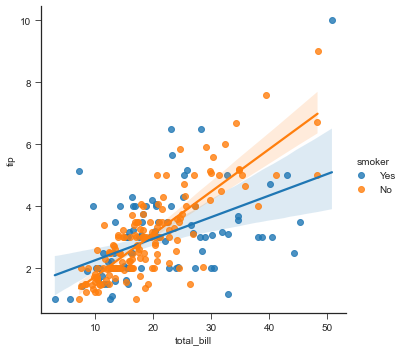

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

    除了颜色之外，还可以使用不同的marker，增加散点的辨识度：

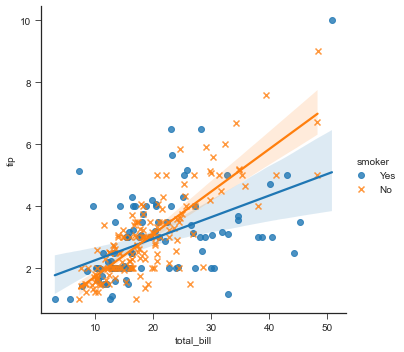

In [26]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"]);

    要添加另一个变量，可以绘制多个“facets”，每个“facet”的每个级别都出现在网格的行或列中：

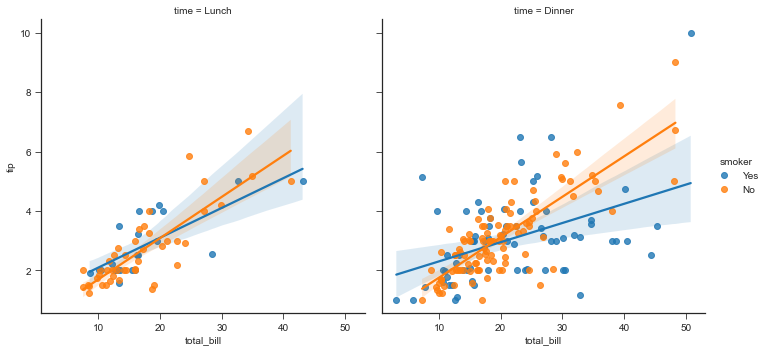

In [27]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

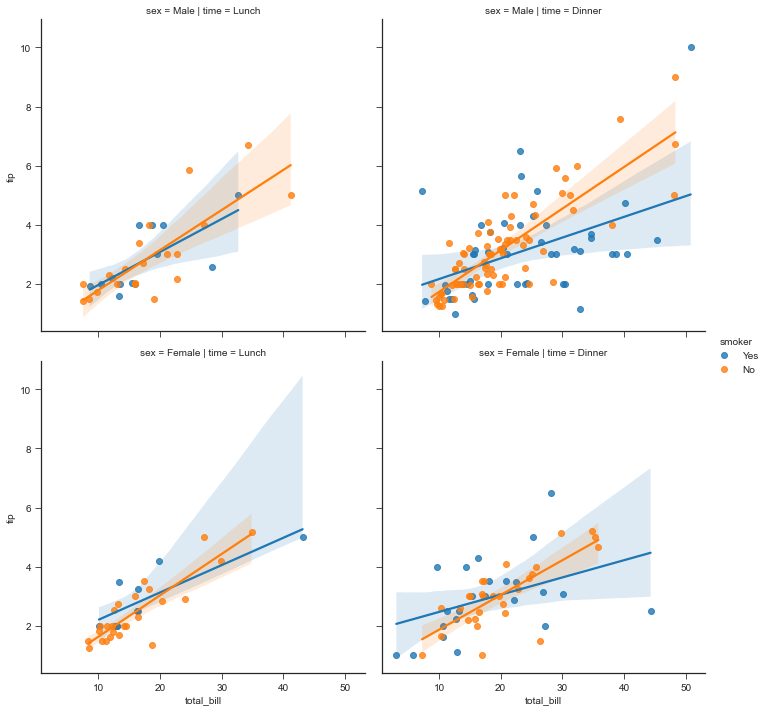

In [28]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## Controlling the size and shape of the plot

    注意到由 regplot() 和 lmplot() 创建的默认图看起来相同，但在具有不同大小和形状的轴上。
    这是因为 regplot() 是一个绘制到特定axes上的axes-level函数。这意味着可以自己制作multi-panel图形，并准确操控回归图。
    如果没有显式提供axes对象，则使用currently active axes。
    要控制图像大小，需要自己创建一个 figure 对象。

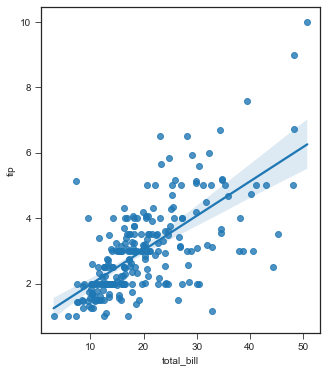

In [29]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

    相比之下，lmplot() 图形的大小和形状是通过使用 FacetGrid 接口的height和aspect参数控制，这些参数适用于图中的每个facet，而不是整体图本身：

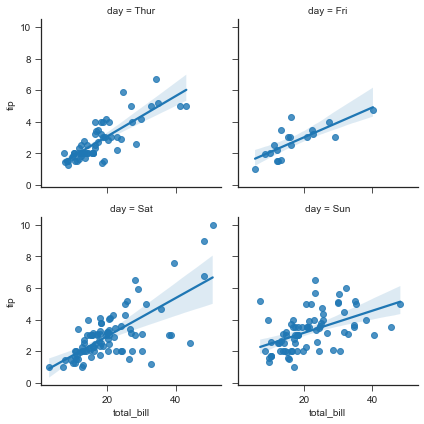

In [30]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

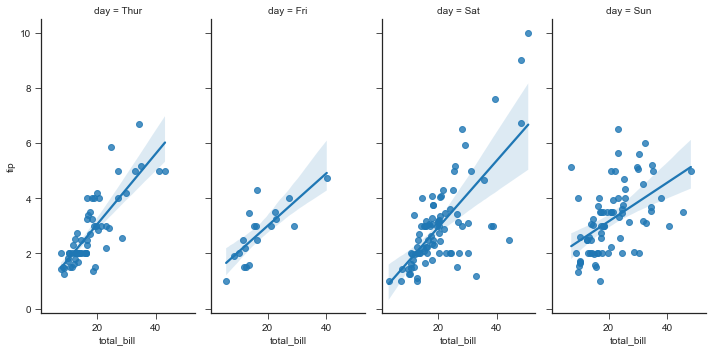

In [31]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## Plotting a regression in other contexts

    regplot() jointplot()函数可绘制更大、更复杂的图。
    
    jointplot() 还可以使用 regplot() 通过传递 kind=“reg” 来显示joint axes上的线性回归拟合：

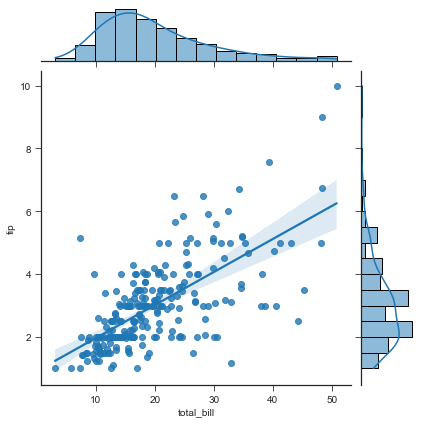

In [32]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

    将 pairplot() 函数与 kind=“reg” 结合使用，或将 regplot() 和 PairGrid 结合起来，以显示数据集中变量之间的线性关系。
    
    注意到pairplot与 lmplot() 是不同的。
    在下图中，两个x轴是不同的，并没有显示两个变量与第三个变量间的关系；
    相反，lmplot() 的 PairGrid() 是用于显示数据集中变量的不同对之间的多个关系：

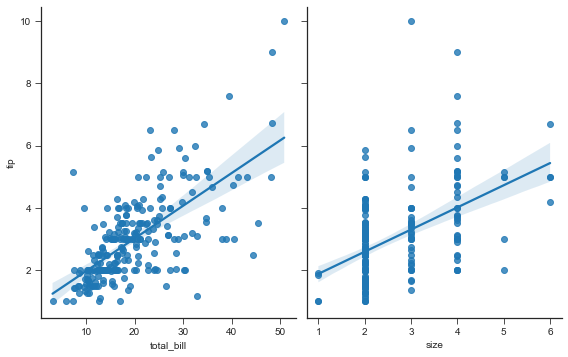

In [33]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

    另外，pairplot() 可以使用 hue 参数附加分类变量。

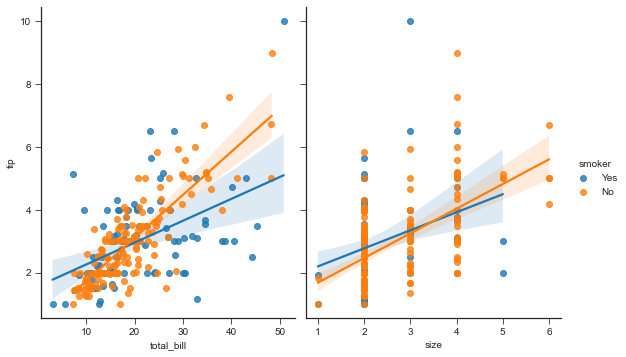

In [34]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");